In [48]:
from ModelTransfuser.ModelTransfuser import *
from ModelTransfuser.simformer import *
import matplotlib.pyplot as plt
import matplotlib.animation
import matplotlib.patches as patches
import seaborn as sns

import numpy as np
import torch
import pandas as pd

from scipy.stats import norm

import os

%matplotlib inline

In [2]:
def gen_data(int):
    theta1 = torch.randn(int) * 3
    x1 = 2 * torch.sin(theta1) + torch.randn(int) * 0.5
    x2 = 0.1 * theta1**2 + 0.5*torch.abs(x1) * torch.randn(int)

    return torch.stack([theta1, x1, x2])

In [38]:
data = gen_data(1000)
val_data = gen_data(1000)
nodes_max = data.shape[0]
node_ids = torch.arange(nodes_max)

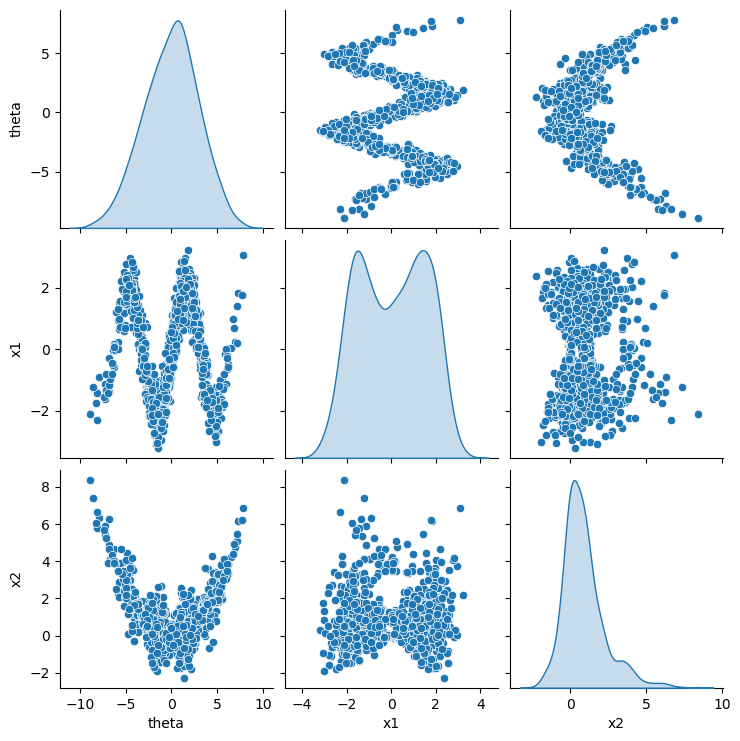

In [39]:
df = pd.DataFrame(data.T.numpy(), columns=['theta', 'x1', 'x2'])
sns.pairplot(df, diag_kind='kde')
plt.show()

In [40]:
model = ModelTransfuser(data.T.shape)

In [41]:
model.train(data.T, val_data=val_data.T, epochs=1000, device="cuda:3", verbose=False)

Training finished after 2.9 minutes


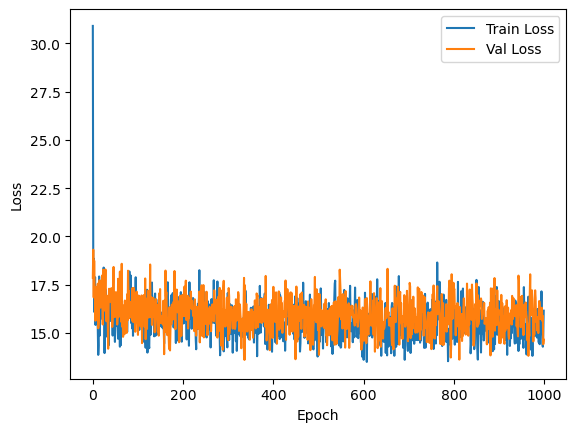

In [43]:
epoch = np.arange(0, len(model.train_loss))

plt.plot(epoch, np.array(model.train_loss)/data.shape[1], label='Train Loss')
plt.plot(epoch, np.array(model.val_loss)/val_data.shape[1], label='Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [44]:
condition_mask = torch.zeros(nodes_max)

In [45]:
s = model.sample(data=torch.tensor([]),condition_mask=condition_mask, num_samples=10000, device="cuda:3")

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:04<00:00,  4.86s/it]


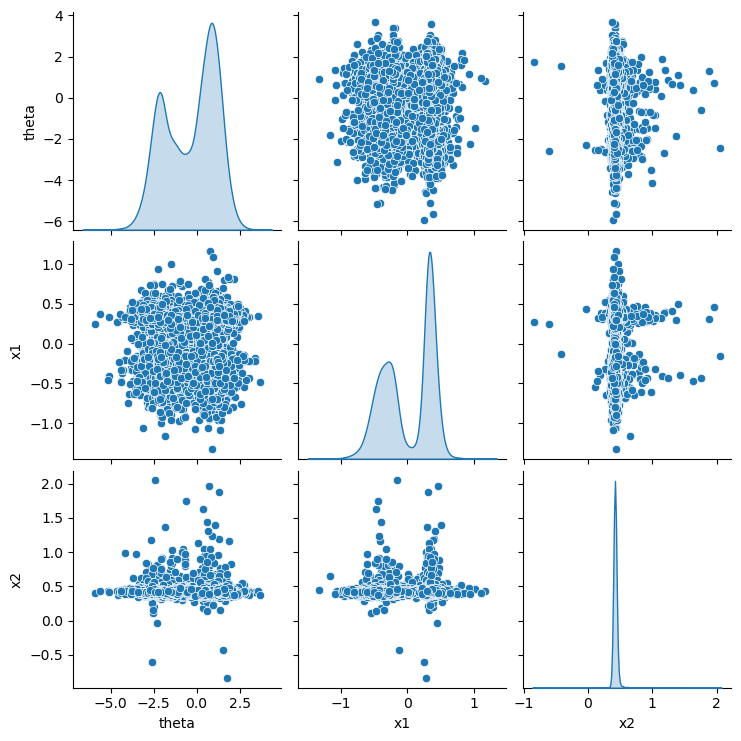

In [46]:
df = pd.DataFrame(s[0].cpu().numpy(), columns=['theta', 'x1', 'x2'])
sns.pairplot(df, diag_kind='kde')
plt.show()

In [14]:
s.shape

torch.Size([1, 100, 3])